# Notebook for performing data cleaning on the dataset
## Import libraries

In [45]:
import pandas as pd
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
import jellyfish

In [46]:
df = pd.read_csv("data.csv")

In [47]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [48]:
# Drop columns that are not used in this analysis
df = df.drop(columns=['Unnamed: 0',"Job Description","Competitors","Easy Apply"])

## Inspect the data and clean missing or flawed values

In [49]:
print(df.isnull().sum())
df = df.dropna()

Job Title            0
Salary Estimate      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


Usually the job title is in the form of "Actual title, something else, more info". Thus, we can probably just take the first words before the first comma, or other special character to make the job titles more coherent.


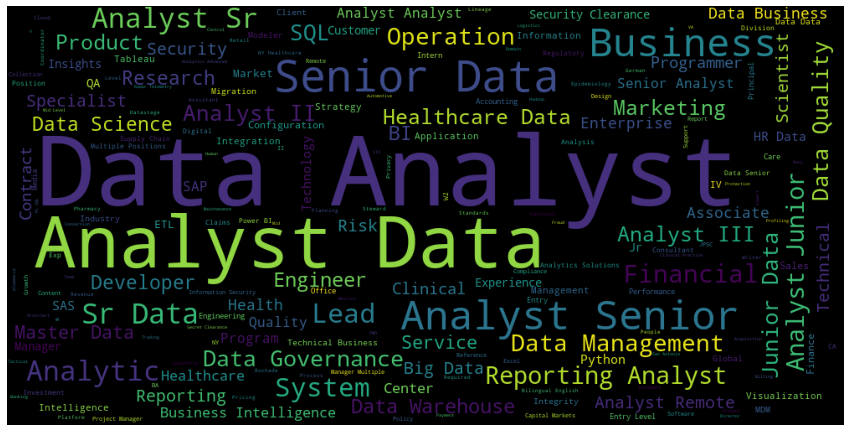

In [50]:
unique_string=(" ").join(df["Job Title"])
wordcloud = wordcloud.WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [51]:
# Top 50 titles from the wordcloud.
new_title_scores = pd.DataFrame.from_dict(wordcloud.words_.items())
new_title_scores.head(5)

,0,1
0,Data Analyst,1.000000
1,Analyst Data,0.472836
2,Senior Data,0.108657
3,Analyst Senior,0.090149
4,Business,0.084179


Now, lets give each job title the most similar string from the wordcloud using Damerau-Levenshtein distance.

In [52]:
def find_most_similar(text,new_titles_list):
    sims = [jellyfish.damerau_levenshtein_distance(text,x) for x in new_titles_list]
    return new_titles_list[sims.index(min(sims))]


In [53]:
df["new_title"] = df["Job Title"].apply(lambda x: find_most_similar(x,new_title_scores[0]))

C:\Users\johma\AppData\Local\Temp/ipykernel_13920/348319044.py:2: DeprecationWarning: getargs: The 'u' format is deprecated. Use 'U' instead.
  sims = [jellyfish.damerau_levenshtein_distance(text,x) for x in new_titles_list]


In [54]:
df["new_title"].value_counts().head(5)

Data Analyst             1314
Senior Analyst            219
Reporting Analyst         165
Analyst Analyst            90
Business Intelligence      56
Name: new_title, dtype: int64

In [55]:
#Remove the "Glassdoor" from salary range
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda s: s.replace(" (Glassdoor est.)",""))

# Remove the "\n" from company names
df["Company Name"] = df["Company Name"].apply(lambda s: s.split("\n")[0])

# Create new features "loc_city" and "hq_city"
df['loc_city'] = df["Location"].apply(lambda s: s.split(",")[0])
df['hq_city'] = df["Headquarters"].apply(lambda s: s.split(",")[0])


In [56]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,new_title,loc_city,hq_city
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Analyst Remote,New York,New York
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Data Analyst,New York,New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Analytics Solutions,New York,New York
3,Data Analyst,$37K-$66K,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Data Analyst,New York,McLean
4,Reporting Data Analyst,$37K-$66K,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),Reporting Analyst,New York,New York


Data looks adequate now, lets start the EDA in another notebook

In [58]:
df.to_csv("clean_data.csv")